In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

pd.set_option('display.max_columns', None)

DATA_DIR = "Data/"
PARQUET_FILE = os.path.join(DATA_DIR, "dvf_clean.parquet")

# ✅ Vérifie si un parquet existe déjà
if os.path.exists(PARQUET_FILE):
    print(f"📦 Fichier Parquet déjà trouvé → chargement rapide : {PARQUET_FILE}")
    df = pd.read_parquet(PARQUET_FILE)

else:
    print("📂 Aucun fichier parquet trouvé, chargement des CSV...")
    files = glob.glob(os.path.join(DATA_DIR, "*.csv"))

    if not files:
        print("⚠️ Aucun fichier trouvé dans Data/. Vérifie ton chemin ou l’extension.")
    else:
        print(f"📦 {len(files)} fichiers trouvés dans Data/")
        df_list = []

        # Colonnes utiles souhaitées
        target_cols = [
            'date_mutation', 'nature_mutation', 'valeur_fonciere', 'code_postal',
            'commune', 'type_local', 'surface_reelle_bati',
            'nombre_pieces_principales', 'surface_terrain'
        ]

        for f in files:
            print(f"\n➡️ Lecture intelligente de : {f}")
            try:
                # Lecture du header uniquement
                temp = pd.read_csv(f, sep='|', nrows=0, low_memory=False)
                # Normalisation des noms de colonnes
                temp.columns = (
                    temp.columns.str.strip()
                                .str.lower()
                                .str.replace(' ', '_')
                                .str.replace('é', 'e')
                                .str.replace('è', 'e')
                                .str.replace('ê', 'e')
                                .str.replace('à', 'a')
                )
                # Colonnes communes
                cols_in_file = [c for c in target_cols if c in temp.columns]

                if not cols_in_file:
                    print(f"⚠️ Aucun des champs utiles trouvés dans {f}. Ignoré.")
                    continue

                # Lecture par morceaux
                for chunk in pd.read_csv(f, sep='|', low_memory=False, chunksize=500_000):
                    # Normalise les colonnes du chunk
                    chunk.columns = (
                        chunk.columns.str.strip()
                                     .str.lower()
                                     .str.replace(' ', '_')
                                     .str.replace('é', 'e')
                                     .str.replace('è', 'e')
                                     .str.replace('ê', 'e')
                                     .str.replace('à', 'a')
                    )

                    # Garde que les colonnes présentes
                    chunk = chunk[[c for c in target_cols if c in chunk.columns]]

                    # Nettoyage
                    chunk = chunk.dropna(subset=['valeur_fonciere', 'code_postal'])
                    chunk['valeur_fonciere'] = pd.to_numeric(chunk['valeur_fonciere'], errors='coerce')
                    chunk['date_mutation'] = pd.to_datetime(chunk['date_mutation'], errors='coerce')
                    chunk = chunk.dropna(subset=['date_mutation'])

                    if 'nature_mutation' in chunk.columns:
                        chunk = chunk[chunk['nature_mutation'].str.contains('Vente', na=False)]

                    # Colonnes dérivées
                    chunk['annee'] = chunk['date_mutation'].dt.year
                    if 'surface_reelle_bati' in chunk.columns:
                        chunk['prix_m2'] = chunk['valeur_fonciere'] / chunk['surface_reelle_bati']

                    df_list.append(chunk)

            except Exception as e:
                print(f"❌ Erreur lors de la lecture de {f}: {e}")

        if not df_list:
            raise ValueError("🚫 Aucun fichier valide chargé.")
        
        df = pd.concat(df_list, ignore_index=True)

        # 💾 Sauvegarde en Parquet compressé
        df.to_parquet(PARQUET_FILE, compression='snappy')
        print(f"\n✅ Données nettoyées et sauvegardées → {PARQUET_FILE}")

print(f"\n📊 {len(df):,} lignes prêtes pour l’analyse.")
print("Aperçu :")
display(df.head(5))

# Aperçu global
print("\n🧠 Aperçu statistique global :")
display(df.describe(include='all'))


📂 Aucun fichier parquet trouvé, chargement des CSV...
📦 5 fichiers trouvés dans Data/

➡️ Lecture intelligente de : Data\ValeursFoncieres-2020.csv


C:\Users\cornum\AppData\Local\Temp\ipykernel_19224\3066231088.py:76: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  chunk['date_mutation'] = pd.to_datetime(chunk['date_mutation'], errors='coerce')
C:\Users\cornum\AppData\Local\Temp\ipykernel_19224\3066231088.py:76: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  chunk['date_mutation'] = pd.to_datetime(chunk['date_mutation'], errors='coerce')
C:\Users\cornum\AppData\Local\Temp\ipykernel_19224\3066231088.py:76: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  chunk['date_mutation'] = pd.to_datetime(chunk['date_mutation'], errors='coerce')
C:\Users\cornum\AppData\Local\Temp\ipykernel_19224\3066231088


➡️ Lecture intelligente de : Data\ValeursFoncieres-2021.csv


C:\Users\cornum\AppData\Local\Temp\ipykernel_19224\3066231088.py:76: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  chunk['date_mutation'] = pd.to_datetime(chunk['date_mutation'], errors='coerce')
C:\Users\cornum\AppData\Local\Temp\ipykernel_19224\3066231088.py:76: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  chunk['date_mutation'] = pd.to_datetime(chunk['date_mutation'], errors='coerce')
C:\Users\cornum\AppData\Local\Temp\ipykernel_19224\3066231088.py:76: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  chunk['date_mutation'] = pd.to_datetime(chunk['date_mutation'], errors='coerce')
C:\Users\cornum\AppData\Local\Temp\ipykernel_19224\3066231088


➡️ Lecture intelligente de : Data\ValeursFoncieres-2022.csv


C:\Users\cornum\AppData\Local\Temp\ipykernel_19224\3066231088.py:76: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  chunk['date_mutation'] = pd.to_datetime(chunk['date_mutation'], errors='coerce')
C:\Users\cornum\AppData\Local\Temp\ipykernel_19224\3066231088.py:76: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  chunk['date_mutation'] = pd.to_datetime(chunk['date_mutation'], errors='coerce')
C:\Users\cornum\AppData\Local\Temp\ipykernel_19224\3066231088.py:76: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  chunk['date_mutation'] = pd.to_datetime(chunk['date_mutation'], errors='coerce')
C:\Users\cornum\AppData\Local\Temp\ipykernel_19224\3066231088


➡️ Lecture intelligente de : Data\ValeursFoncieres-2023.csv


C:\Users\cornum\AppData\Local\Temp\ipykernel_19224\3066231088.py:76: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  chunk['date_mutation'] = pd.to_datetime(chunk['date_mutation'], errors='coerce')
C:\Users\cornum\AppData\Local\Temp\ipykernel_19224\3066231088.py:76: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  chunk['date_mutation'] = pd.to_datetime(chunk['date_mutation'], errors='coerce')
C:\Users\cornum\AppData\Local\Temp\ipykernel_19224\3066231088.py:76: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  chunk['date_mutation'] = pd.to_datetime(chunk['date_mutation'], errors='coerce')
C:\Users\cornum\AppData\Local\Temp\ipykernel_19224\3066231088


➡️ Lecture intelligente de : Data\ValeursFoncieres-2024.csv


C:\Users\cornum\AppData\Local\Temp\ipykernel_19224\3066231088.py:76: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  chunk['date_mutation'] = pd.to_datetime(chunk['date_mutation'], errors='coerce')
C:\Users\cornum\AppData\Local\Temp\ipykernel_19224\3066231088.py:76: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  chunk['date_mutation'] = pd.to_datetime(chunk['date_mutation'], errors='coerce')



✅ Données nettoyées et sauvegardées → Data/dvf_clean.parquet

📊 13,399,083 lignes prêtes pour l’analyse.
Aperçu :


,date_mutation,nature_mutation,valeur_fonciere,code_postal,commune,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,annee,prix_m2
0,2020-07-01,Vente,NaN,1250.0,CEYZERIAT,NaN,NaN,NaN,1061.0,2020,NaN
1,2020-02-01,Vente,NaN,1290.0,LAIZ,NaN,NaN,NaN,85.0,2020,NaN
2,2020-02-01,Vente,NaN,1290.0,LAIZ,NaN,NaN,NaN,1115.0,2020,NaN
3,2020-02-01,Vente,NaN,1290.0,LAIZ,NaN,NaN,NaN,1940.0,2020,NaN
4,2020-02-01,Vente,NaN,1290.0,LAIZ,NaN,NaN,NaN,1148.0,2020,NaN



🧠 Aperçu statistique global :


,date_mutation,nature_mutation,valeur_fonciere,code_postal,commune,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,annee,prix_m2
count,13399083,13399083,0.0,1.339908e+07,13399083,8082076,8.073907e+06,8.073907e+06,9.197751e+06,1.339908e+07,0.0
unique,NaN,3,NaN,NaN,31418,4,NaN,NaN,NaN,NaN,NaN
top,NaN,Vente,NaN,NaN,TOULOUSE,Dépendance,NaN,NaN,NaN,NaN,NaN
freq,NaN,12686842,NaN,NaN,92191,3250880,NaN,NaN,NaN,NaN,NaN
mean,2022-05-23 19:30:24.767950336,NaN,NaN,5.365715e+04,NaN,NaN,6.794569e+01,1.889557e+00,2.775742e+03,2.021872e+03,NaN
min,2020-01-01 00:00:00,NaN,NaN,1.000000e+03,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.020000e+03,NaN
25%,2021-05-05 00:00:00,NaN,NaN,3.350000e+04,NaN,NaN,0.000000e+00,0.000000e+00,2.430000e+02,2.021000e+03,NaN
50%,2022-05-11 00:00:00,NaN,NaN,5.600000e+04,NaN,NaN,3.900000e+01,1.000000e+00,6.050000e+02,2.022000e+03,NaN
75%,2023-06-09 00:00:00,NaN,NaN,7.500700e+04,NaN,NaN,8.300000e+01,4.000000e+00,1.691000e+03,2.023000e+03,NaN
max,2024-12-31 00:00:00,NaN,NaN,9.749000e+04,NaN,NaN,2.375000e+05,1.980000e+02,1.072309e+07,2.024000e+03,NaN


c:\Users\cornum\Desktop\Project-DATA-SCIENCE-INVESTMENT-\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


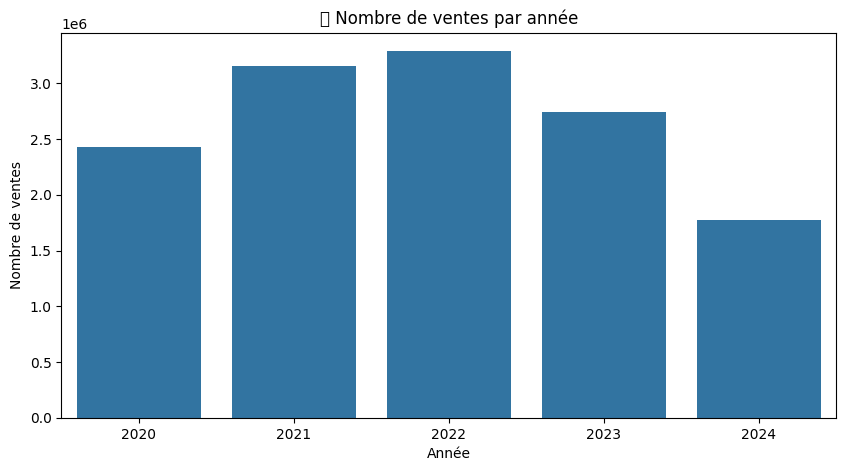

In [2]:
plt.figure(figsize=(10,5))
sns.countplot(x='annee', data=df, order=sorted(df['annee'].unique()))
plt.title("📅 Nombre de ventes par année")
plt.xlabel("Année")
plt.ylabel("Nombre de ventes")
plt.show()


c:\Users\cornum\Desktop\Project-DATA-SCIENCE-INVESTMENT-\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127969 (\N{HOUSE WITH GARDEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


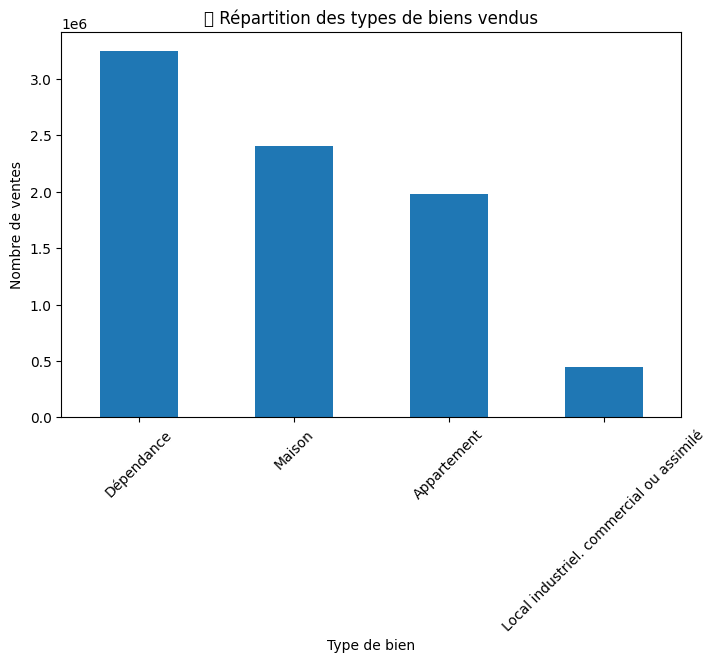

In [4]:
plt.figure(figsize=(8,5))
df['type_local'].value_counts().plot(kind='bar')
plt.title("🏡 Répartition des types de biens vendus")
plt.xlabel("Type de bien")
plt.ylabel("Nombre de ventes")
plt.xticks(rotation=45)
plt.show()


c:\Users\cornum\Desktop\Project-DATA-SCIENCE-INVESTMENT-\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


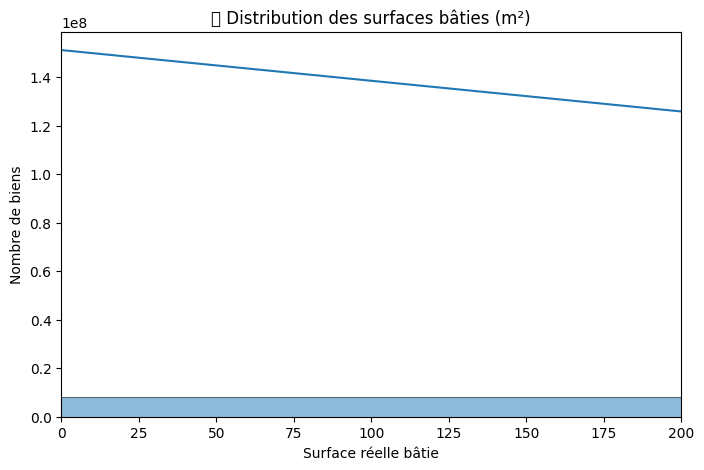

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['surface_reelle_bati'], bins=100, kde=True)
plt.xlim(0, 200)
plt.title("📐 Distribution des surfaces bâties (m²)")
plt.xlabel("Surface réelle bâtie")
plt.ylabel("Nombre de biens")
plt.show()


ValueError: Axis limits cannot be NaN or Inf

c:\Users\cornum\Desktop\Project-DATA-SCIENCE-INVESTMENT-\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\cornum\Desktop\Project-DATA-SCIENCE-INVESTMENT-\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


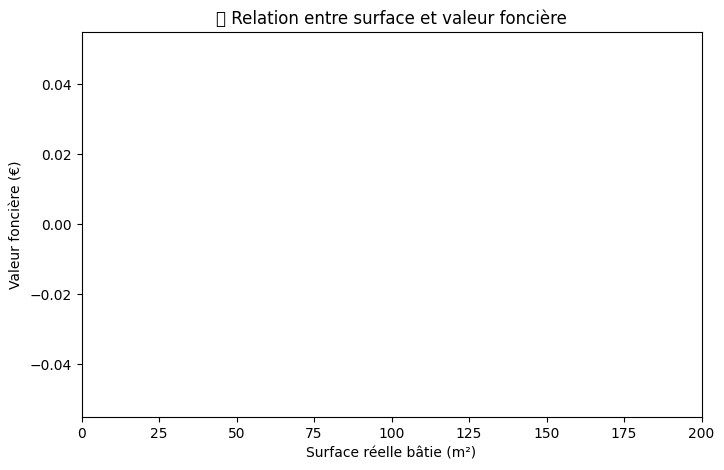

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df.sample(10_000, random_state=42),  # échantillon pour performance
    x='surface_reelle_bati',
    y='valeur_fonciere',
    alpha=0.3
)
plt.title("📊 Relation entre surface et valeur foncière")
plt.xlabel("Surface réelle bâtie (m²)")
plt.ylabel("Valeur foncière (€)")
plt.xlim(0, 200)
plt.ylim(0, df['valeur_fonciere'].quantile(0.99))
plt.show()
